In [1]:
import pandas as pd
import requests

In [2]:
request = requests.get('https://api.themoviedb.org/3/search/movie?api_key=c6791e522de342ab2838a404558085e5&language=en-US&query=the+santa+suit&page=1&include_adult=false')

In [3]:
request

<Response [200]>

In [4]:
request = request.json()

In [6]:
print(request['results'][0]['title']+'\n', request['results'][0]['overview'])

The Santa Suit
 Drake Hunter, the president of Hunter Marketing, has the perfect plan to boost sales for his father's toy company over the holiday season--hire department store Santas to promote his father's merchandise. When the real Santa Claus turns Drake into a Santa lookalike, Drake finds himself working as a dress-up Kris Kringle to make ends meet. Stripped of power and position, Drake discovers the importance of honesty, compassion, and respect as he helps an unprivileged girl enjoy the magic of Christmas. Stars Kevin Sorbo.


In [7]:
import scrapy

In [42]:
import requests
from urllib.request import urlopen
from lxml import etree

In [294]:
url = "https://en.wikipedia.org/wiki/List_of_Hallmark_Channel_Original_Movies"
headers = {'Content-Type': 'text/html'}
response = requests.get(url, headers=headers)
html = response.text

In [295]:
with open ('wikixmas', 'w') as f:
    f.write(html)

In [296]:
local = 'file:///Users/martinkihn/Desktop/wikixmas'
response = urlopen(local)
htmlparser = etree.HTMLParser()
tree = etree.parse(response, htmlparser)

In [315]:
titles = tree.xpath('//*[@id="mw-content-text"]/div[1]/table[30]/tbody/tr/td[1]/i/text()')

In [316]:
titles2020 = titles
df = pd.DataFrame(titles2020)
df.to_csv('titles2020.csv', index=False, header=False)

In [317]:
pwd

'/Users/martinkihn/Desktop'

In [329]:
master = pd.read_csv('movies_before_2015.csv')
type(master)

pandas.core.frame.DataFrame

In [334]:
master.shape

(90, 2)

In [335]:
titles = []
years = ['2015', '2016', '2017', '2018', '2019', '2020']

In [345]:
for year in years:
    df = pd.read_csv('titles' + year + '.csv', header=None)
    df = pd.DataFrame(df)
    df.columns = ['titles']
    df['year'] = year
    master = master.append(df, ignore_index=True)

In [346]:
master.shape

(261, 2)

In [347]:
master.append(df, ignore_index=True)

,titles,year
0,The Christmas Ornament,2013
1,Christmas in Conway,2013
2,Northpole,2014
3,Let It Snow,2013
4,Christmas Angel,2012
...,...,...
278,Christmas She Wrote,2020
279,"Love, Lights, Hanukkah!",2020
280,Christmas Comes Twice,2020
281,A Christmas Carousel,2020


In [348]:
master.shape, df.shape

((261, 2), (22, 2))

In [351]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titles  261 non-null    object
 1   year    261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [355]:
masterx = master.copy()

In [357]:
masterx['year'] = masterx.year.astype(int)

In [359]:
masterx = masterx.sort_values(by='year').reset_index(drop=True)

In [360]:
masterx

,titles,year
0,The Christmas Box,1995
1,Ms. Scrooge,1997
2,Saint Maybe,1998
3,A Season for Miracles,1999
4,The Christmas Secret,2000
...,...,...
256,One Royal Holiday,2020
257,Jingle Bell Bride,2020
258,A Christmas Carousel,2020
259,Heart of the Holidays,2020


In [361]:
masterx.to_csv('xmas_titles.csv', header=True, index=False)

In [362]:
masterx.shape

(261, 2)

In [363]:
request = requests.get('https://api.themoviedb.org/3/search/movie?api_key=c6791e522de342ab2838a404558085e5&language=en-US&query=the+santa+suit&page=1&include_adult=false')
request = request.json()
print(request['results'][0]['title']+'\n', request['results'][0]['overview'])

The Santa Suit
 Drake Hunter, the president of Hunter Marketing, has the perfect plan to boost sales for his father's toy company over the holiday season--hire department store Santas to promote his father's merchandise. When the real Santa Claus turns Drake into a Santa lookalike, Drake finds himself working as a dress-up Kris Kringle to make ends meet. Stripped of power and position, Drake discovers the importance of honesty, compassion, and respect as he helps an unprivileged girl enjoy the magic of Christmas. Stars Kevin Sorbo.


In [364]:
master = masterx.copy()

In [365]:
master.shape

(261, 2)

In [366]:
master.sample(3)

,titles,year
236,A Christmas Love Story,2019
122,Every Christmas Has a Story,2016
24,Holiday Baggage,2008


In [369]:
master['lower_titles'] = master.titles.str.lower()

In [370]:
master.sample(3)

,titles,year,lower_titles
120,A Wish for Christmas,2016,a wish for christmas
34,The Santa Suit,2010,the santa suit
165,A Midnight Kiss,2018,a midnight kiss


In [371]:
master['searchstr'] = master.lower_titles.str.replace('[^a-zA-Z0-9 ]', '')

In [372]:
master.sample(3)

,titles,year,lower_titles,searchstr
88,Mr. Miracle,2014,mr. miracle,mr miracle
182,Jingle Around the Clock,2018,jingle around the clock,jingle around the clock
185,Christmas at Pemberley Manor,2018,christmas at pemberley manor,christmas at pemberley manor


In [373]:
master['searchstr'] = master['searchstr'].replace(' ', '+', regex=True)

In [377]:
master['year'] = master.year.astype(str)

In [378]:
master.sample(3)

,titles,year,lower_titles,searchstr
134,Royal New Year's Eve,2017,royal new year's eve,royal+new+years+eve
197,Homegrown Christmas,2018,homegrown christmas,homegrown+christmas
137,Maggie's Christmas Miracle,2017,maggie's christmas miracle,maggies+christmas+miracle


In [379]:
master['apistr'] = 'https://api.themoviedb.org/3/search/movie?api_key=c6791e522de342ab2838a404558085e5&language=en-US&query=' + master['searchstr'] + '&page=1&include_adult=false&year=' + master['year'] + ''''''

In [380]:
master.sample(3)

,titles,year,lower_titles,searchstr,apistr
155,The Sweetest Christmas,2017,the sweetest christmas,the+sweetest+christmas,https://api.themoviedb.org/3/search/movie?api_...
2,Saint Maybe,1998,saint maybe,saint+maybe,https://api.themoviedb.org/3/search/movie?api_...
5,"Santa, Jr.",2002,"santa, jr.",santa+jr,https://api.themoviedb.org/3/search/movie?api_...


In [381]:
master.to_csv('api_xmas_file.csv', header=True, index=False)

In [387]:
titles = list()
plots = list()
for index, row in master.iterrows():
    try:
        request = requests.get(row['apistr'])
        request = request.json()
        titles.append(request['results'][0]['title'])
        plots.append(request['results'][0]['overview'])
    except:
        continue

In [389]:
len(titles), len(plots)

(260, 260)

In [392]:
master_list = list(zip(titles,plots))

In [396]:
master_df = pd.DataFrame(master_list, columns=['titles', 'plots'])

In [397]:
master_df.to_csv('master_df.csv', header=True, index=False)

In [398]:
master_df.sample(2)

,titles,plots
2,Saint Maybe,A lonely teen troubled by a past family traged...
49,The Case for Christmas,An up-and-coming attorney risks it all to help...


In [399]:
plots = master_df.plots
type(plots)

pandas.core.series.Series

In [403]:
text = plots.to_string(index=False)

In [409]:
text = text.replace('\n', '')

In [410]:
len(text)

13000

In [411]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

In [428]:
additional_stopwords = []
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + additional_stopwords
    text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [423]:
type(text)

str

In [415]:
with open("text.txt", "w") as text_file:
    print(text, file=text_file)

In [429]:
text_clean = basic_clean(text)

In [430]:
len(text_clean)

1338

In [431]:
with open("text_clean.txt", "w") as text_file:
    print(text_clean, file=text_file)

In [432]:
len(text), len(text_clean)

(13000, 1338)

In [437]:
type(text_clean)
text_stemmed_list = text_clean.copy()
text_stemmed_string = " ".join(text_clean)

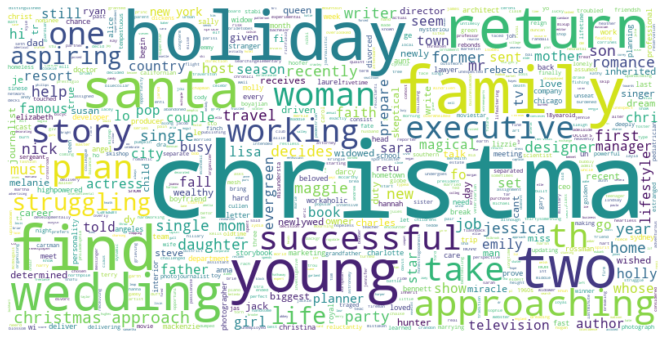

In [438]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, 
              width=800, height=400)
wc.generate(text_stemmed_string)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [444]:
from nltk import FreqDist
fdist1 = FreqDist(text_stemmed_string.split())

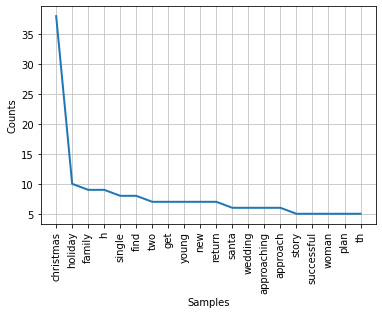

In [453]:
fdist1.plot(20)

In [461]:
bigrams = (pd.Series(nltk.ngrams(text_stemmed_list, 2)).value_counts())[:20]

In [462]:
bigrams

(christmas, approach)       5
(single, mom)               4
(new, york)                 3
(christmas, approaching)    3
(newlywed, couple)          2
(le, month)                 2
(loved, one)                2
(recently, divorced)        2
(find, th)                  2
(told, would)               2
(interior, designer)        2
(los, angeles)              2
(back, hometown)            2
(fast, approaching)         2
(single, mother)            2
(return, home)              2
(talk, show)                2
(would, le)                 2
(marketing, executive)      2
(christmas, wedding)        2
dtype: int64

In [463]:
trigrams = (pd.Series(nltk.ngrams(text_stemmed_list, 3)).value_counts())[:20]

In [464]:
trigrams

(new, york, city)                 2
(told, would, le)                 2
(would, le, month)                2
(jones, accused, p)               1
(duncan, mayor, decides)          1
(evans, abandoned, neerd)         1
(charles, whitley, travel)        1
(book, editor, must)              1
(journalistic, lindsay, faced)    1
(h, determined, unseat)           1
(work, planning, annual)          1
(romance, writer, colum)          1
(one, famous, actress)            1
(producer, maggie, baker)         1
(admit, steve, cynthia)           1
(befor, corrines, holiday)        1
(begin, receiving, ornament)      1
(restaurant, b, kayleigh)         1
(book, become, lifestyle)         1
(shop, owner, alice)              1
dtype: int64

Text(0.5, 0, '# of Occurrences')

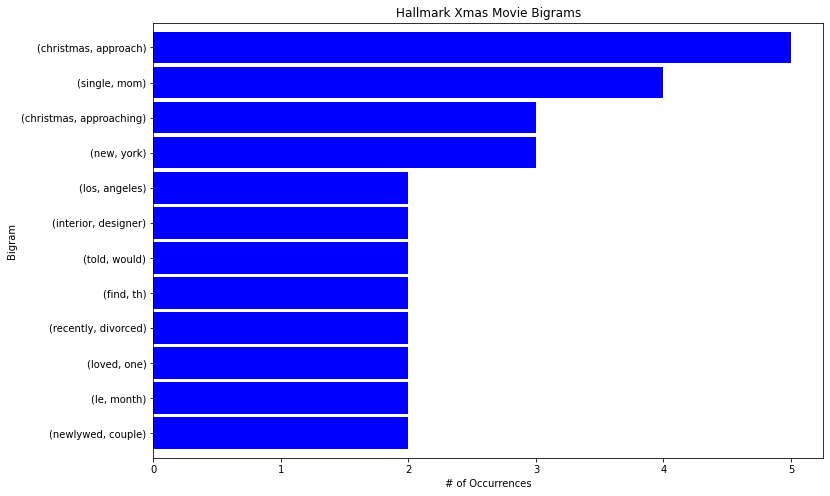

In [466]:
bigrams = bigrams[:12]
bigrams.sort_values().plot.barh(color='blue',
                                width=.9, figsize=(12,8))
plt.title('Hallmark Xmas Movie Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

In [467]:
plot_tokens = nltk.word_tokenize(text_stemmed_string)

In [468]:
plot_text = nltk.Text(plot_tokens)

In [476]:
plot_text

<Text: skishop owner reluctantly move hi television movie updating...>

In [485]:
## don't seem to have enough text to do 'similar'

In [487]:
## go to next workbook to work on nlg